In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rc('font',family = 'SimHei',size = 13)
import datetime
import seaborn as sns

In [4]:
path = "data_2.csv"
data_2 = pd.read_csv(path)
data_2.head()

,Unnamed: 0,Customer ID,Cohort_Month,Nos_of_purchase,GMV,Month_Gap,Cohort_Index,Last_Gap,Product_Wide,Price_Mean,1st_GMV,1st_Product_Wide,1st_Month_Frequency,Churn,Type,Tag_PW,Cohort_Index2,Tag_GMV,Tag_Price
0,0,12346,200912,11,77556.46,0.393939,13,11,27,6.100000,45.00,1,5,1,Old Customer,1,15,<50,[5-11)
1,1,12347,201010,7,5408.50,0.049793,12,2,123,2.605868,611.53,40,1,0,Old Customer,40-44,12,600-650,[2-3)
2,2,12348,201009,5,2019.40,0.240000,12,3,25,3.786275,222.16,20,1,0,Old Customer,20-24,12,200-250,[3-4)
3,3,12349,201004,4,4428.69,0.109195,19,1,138,8.459657,1068.52,46,1,0,Old Customer,>=45,21,>=1000,[5-11)
4,4,12350,201102,1,334.40,0.000000,0,10,17,3.841176,334.40,17,1,1,Old Customer,15-19,0,300-350,[3-4)


In [5]:
One_purchaser = data_2[data_2['Nos_of_purchase']==1].reset_index()
One_purchaser.groupby('Type').agg({'Customer ID':'nunique','Churn':'sum'})

,Customer ID,Churn
Type,,
Fresh Customer,463,0
Old Customer,1190,1190


In [12]:
## 一次购买者 按照GMV 分析

temp = One_purchaser[One_purchaser['Type']=='Old Customer'].groupby('Tag_GMV').agg({'Customer ID':'nunique'})
temp['%'] = temp['Customer ID']/1190
temp.sort_values('Customer ID')


,Customer ID,%
Tag_GMV,,
750-800,2,0.001681
850-900,4,0.003361
950-1000,6,0.005042
800-850,8,0.006723
650-700,8,0.006723
900-950,9,0.007563
700-750,12,0.010084
600-650,13,0.010924
550-600,23,0.019328


In [18]:
temp2 = One_purchaser[One_purchaser['Type']=='Old Customer']['1st_GMV']
temp2.describe()

count     1190.000000
mean       334.795960
std        639.107719
min          0.000000
25%        132.317500
50%        221.740000
75%        357.550000
max      11880.840000
Name: 1st_GMV, dtype: float64

<AxesSubplot:xlabel='1st_GMV', ylabel='Density'>

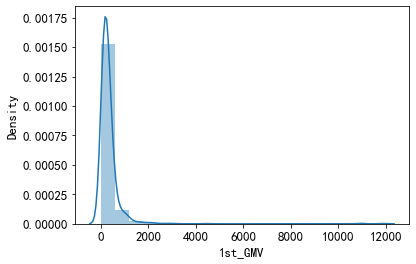

In [17]:
sns.distplot(temp2,bins = 20 )

In [29]:
LargeValueCustomer = One_purchaser[(One_purchaser['Type']=='Old Customer') & (One_purchaser['1st_GMV']>1000)][['Customer ID','Cohort_Month','GMV','Last_Gap','Product_Wide','Price_Mean','1st_Product_Wide','Tag_PW','Tag_Price']]
LargeValueCustomer

,Customer ID,Cohort_Month,GMV,Last_Gap,Product_Wide,Price_Mean,1st_Product_Wide,Tag_PW,Tag_Price
2,12354,201104,1079.400,8,58,4.503793,58,>=45,[4-5)
5,12385,201011,1938.400,13,65,3.680769,65,>=45,[3-4)
33,12486,201010,1037.280,14,49,4.103673,49,>=45,[4-5)
39,12501,201101,2169.390,11,149,2.412685,149,>=45,[2-3)
40,12503,201005,1126.000,19,2,115.800000,2,2,>=11
44,12511,201010,3084.020,14,190,3.430684,190,>=45,[3-4)
90,12666,201011,1248.420,13,31,3.846774,31,30-34,[3-4)
92,12671,201004,2622.481,20,45,2.726467,45,>=45,[2-3)
111,12742,201003,1201.520,21,67,1.708657,67,>=45,[1-2)
119,12764,201101,1693.880,11,45,5.387556,45,>=45,[5-11)


In [31]:
LargeValueCustomer[(LargeValueCustomer['1st_Product_Wide']>4)&(LargeValueCustomer['Price_Mean']<5)]

,Customer ID,Cohort_Month,GMV,Last_Gap,Product_Wide,Price_Mean,1st_Product_Wide,Tag_PW,Tag_Price
2,12354,201104,1079.400,8,58,4.503793,58,>=45,[4-5)
5,12385,201011,1938.400,13,65,3.680769,65,>=45,[3-4)
33,12486,201010,1037.280,14,49,4.103673,49,>=45,[4-5)
39,12501,201101,2169.390,11,149,2.412685,149,>=45,[2-3)
44,12511,201010,3084.020,14,190,3.430684,190,>=45,[3-4)
90,12666,201011,1248.420,13,31,3.846774,31,30-34,[3-4)
92,12671,201004,2622.481,20,45,2.726467,45,>=45,[2-3)
111,12742,201003,1201.520,21,67,1.708657,67,>=45,[1-2)
122,12769,201104,1143.600,8,32,4.456250,32,30-34,[4-5)
134,12801,201007,1071.820,17,50,4.597400,50,>=45,[4-5)


In [32]:
# 2次购买者

One_purchaser[One_purchaser['Type']!='Fresh Customer']['Product_Wide'].describe()
Two_purchaser = data_2[data_2['Nos_of_purchase']==2].reset_index()
Two_purchaser['2nd_GMV']=Two_purchaser['GMV']-Two_purchaser['1st_GMV']

Two_purchaser



## 2次购买者按cohort Month 分析

TwoPurchaseByCohortMonth = Two_purchaser.groupby('Cohort_Month').agg({'Customer ID':'nunique','Churn':'sum'})   
TwoPurchaseByCohortMonth['Churn Rate']= TwoPurchaseByCohortMonth['Churn']/TwoPurchaseByCohortMonth['Customer ID']
TwoPurchaseByCohortMonth = TwoPurchaseByCohortMonth.rename({'Customer ID':'Nos_of_customer'},axis=1)
## TwoPurchaseByCohortMonth = TwoPurchaseByCohortMonth.reset_index()
TwoPurchaseByCohortMonth

Three_purchaser = data_2[data_2['Nos_of_purchase']==3].reset_index()
Three_purchaser

ThreePurchaseByCohortMonth = Three_purchaser.groupby('Cohort_Month').agg({'Customer ID':'nunique','Churn':'sum'})   
ThreePurchaseByCohortMonth['Churn Rate']= ThreePurchaseByCohortMonth['Churn']/ThreePurchaseByCohortMonth['Customer ID']
ThreePurchaseByCohortMonth = ThreePurchaseByCohortMonth.rename({'Customer ID':'Nos_of_customer'},axis=1)
##ThreePurchaseByCohortMonth = ThreePurchaseByCohortMonth.reset_index()
ThreePurchaseByCohortMonth

total = OnePurchaseByCohortMonth.join(TwoPurchaseByCohortMonth.join(ThreePurchaseByCohortMonth,lsuffix='2', rsuffix='3'),lsuffix='1', rsuffix='2')
total.to_excel('123purchaser.xlsx')

total=total.reset_index()

total['Cohort_Month']=total['Cohort_Month'].astype(str)

total

total.plot.line(figsize = (20,15),x='Cohort_Month',y=['Churn Rate','Churn Rate2','Churn Rate3'])

## 2次购买者 GMV 分析
Two_purchaser

## 已经流失的人的1st GMV
Two_purchaser[Two_purchaser['Churn']==1][['1st_GMV','GMV']].describe()

## 还没有流失的人的1st GMV
Two_purchaser[Two_purchaser['Churn']==0][['1st_GMV','GMV']].describe()

Two_purchaser['GMV_Group']=Two_purchaser['1st_GMV'].apply(GmvClassifiers)
Two_purchaser

TwoPurchaseByFirstGMV = Two_purchaser[Two_purchaser['Churn']==1].groupby('GMV_Group').agg({'Customer ID':'nunique'})
TwoPurchaseByFirstGMV

Two_purchaser[Two_purchaser['Churn']==0].groupby('GMV_Group').agg({'Customer ID':'nunique'})

## 2次购买者 按照1st_Month_Freqnency 分析

Two_purchaser[Two_purchaser['Churn']==0].groupby('1st_Month_Frequency').agg({'Customer ID':'nunique'})

NameError: name 'OnePurchaseByCohortMonth' is not defined